In [1]:
# reading data
import pandas as pd
# Save file
from pandas import ExcelWriter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Importing tree, Pipeline, GridSearchCV from sklearn
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [4]:
from sklearn.metrics import make_scorer,f1_score, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [5]:
from sklearn.inspection import permutation_importance

In [6]:
import re

In [7]:
%matplotlib inline

# Part - 1. Data Acquisition  & Data Cleaning 

In [8]:
def view_empty_values(df: pd.DataFrame) -> pd.DataFrame:
    """
    Displays the count and % of empty values in a dataframe.
    """
    res = pd.concat([df.dtypes, df.isnull().sum(), df.isnull().sum() / len(df)], axis=1)
    res.columns = ["Dtype", "Count of missing", "% of missing"]
    return res

## 1. Reading the Facilities dataset

In [9]:
df_facility = pd.read_csv("dataset/Facilities.txt", error_bad_lines=False, delimiter= '|')
df_facility.head(2)

,Facility_Name,Facility_Location_Code,Facility_Type_Of_Facility,Facility_Hospital_Designation_List,Facility_Latitude,Facility_Longitude,Facility_Full_Address
0,Novant Health UVA Haymarket Medical Center,216,Free Standing Emergency Room,Hospital (General),38.423916,77.401647,"15225 Heathcote Blvd, Haymarket, Virginia, 201..."
1,Kaiser Permanente - Tysons Corner - Advanced U...,700,Free Standing Emergency Room,NaN,38.929137,77.224601,"8008 Westpark Drive, McLean, Virginia, 22102, ..."


## 2. Handling the null values of Facilities dataset

In [10]:
df_facility.isnull().sum().sort_values()

Facility_Name                         0
Facility_Location_Code                0
Facility_Full_Address                 0
Facility_Type_Of_Facility             2
Facility_Latitude                     3
Facility_Longitude                    3
Facility_Hospital_Designation_List    7
dtype: int64

In [11]:
#### 2.a. Feature - Facility Latitude, Longitude 

In [12]:
df_facility.Facility_Latitude.fillna(0, inplace=True)

In [13]:
df_facility.Facility_Longitude.fillna(0, inplace=True)

In [14]:
df_facility.Facility_Name.unique()

array(['Novant Health UVA Haymarket Medical Center',
       'Kaiser Permanente - Tysons Corner - Advanced Urgent Care',
       'Landing Zone / Non-Hospital', 'MWHC Stafford Hospital',
       'Kaiser Permanente - Woodbridge - Advanced Urgent Care',
       'Merrifield Mental Health',
       'Walter Reed National Military Medical Center',
       'Suburban Hospital', 'Landing Zone', 'Inova Mount Vernon Hospital',
       'MedStar Southern Maryland Hospital Center',
       'Inova HealthPlex - Ashburn', "Children's National Medical Center",
       'Sibley Memorial Hospital',
       'Inova Emergency Care Center - Reston/Herndon',
       'George Washington University Hospital',
       'Novant Health UVA Prince William Medical Center',
       'Inova Alexandria Hospital',
       'Inova HealthPlex - Franconia/Springfield',
       'Inova Fairfax Hospital', 'HCA StoneSprings Hospital Center',
       'Inova Healthplex - Lorton',
       ' Sentara Northern Virginia Medical Center',
       'Fort Belvoir

#### Referred hospital description for filling missing values


|  Facility_Name  | Facility_Hospital_Designation_List | Check with partners |
| --- | --- | --- |
| Landing Zone / Non-Hospital	 | non hospital | Confirmed |
|Kaiser Permanente - Tysons Corner - Advanced U...|Hospital General | Confirmed |
|MedStar Southern Maryland Hospital Center | Hospital(General), Burns, Stroke, trauma | Confirmed|
|HCA StoneSprings Hospital Center|Hospital General | Confirmed|
|Out Of Area Hospital Not Listed	 | Hospital General  |Confirmed|

#### 2.b. Feature - Facility_Hospital_Designation_List

In [15]:
# Confirmation with partners and speciality for hospital in google the following values were replaced

df_facility.loc[ df_facility['Facility_Name'].isin(['Kaiser Permanente - Tysons Corner - Advanced Urgent Care','Kaiser Permanente - Woodbridge - Advanced Urgent Care','HCA StoneSprings Hospital Center', 'Out Of Area Hospital Not Listed']), 'Facility_Hospital_Designation_List'] = 'Hospital(General)'

In [16]:

df_facility.loc[ df_facility['Facility_Name'].isin(['Landing Zone / Non-Hospital','Landing Zone']), 'Facility_Hospital_Designation_List'] = 'Non Hospital'

In [17]:

df_facility.loc[ df_facility['Facility_Name'].isin(['MedStar Southern Maryland Hospital Center']), 'Facility_Hospital_Designation_List'] = 'Hospital(General), Burns, Stroke, trauma'

#### 2.c. Feature - Facility_Type_Of_Facility

In [18]:
# Replacing null values for facility_type  with 'Non hospital service'
df_facility.Facility_Type_Of_Facility.fillna('Non hospital service', inplace=True)

In [19]:
# All  null values in facility dataset were handled
df_facility.isnull().sum().sort_values()

Facility_Name                         0
Facility_Location_Code                0
Facility_Type_Of_Facility             0
Facility_Hospital_Designation_List    0
Facility_Latitude                     0
Facility_Longitude                    0
Facility_Full_Address                 0
dtype: int64

In [20]:
df_facility['Facility_Name'].unique()

array(['Novant Health UVA Haymarket Medical Center',
       'Kaiser Permanente - Tysons Corner - Advanced Urgent Care',
       'Landing Zone / Non-Hospital', 'MWHC Stafford Hospital',
       'Kaiser Permanente - Woodbridge - Advanced Urgent Care',
       'Merrifield Mental Health',
       'Walter Reed National Military Medical Center',
       'Suburban Hospital', 'Landing Zone', 'Inova Mount Vernon Hospital',
       'MedStar Southern Maryland Hospital Center',
       'Inova HealthPlex - Ashburn', "Children's National Medical Center",
       'Sibley Memorial Hospital',
       'Inova Emergency Care Center - Reston/Herndon',
       'George Washington University Hospital',
       'Novant Health UVA Prince William Medical Center',
       'Inova Alexandria Hospital',
       'Inova HealthPlex - Franconia/Springfield',
       'Inova Fairfax Hospital', 'HCA StoneSprings Hospital Center',
       'Inova Healthplex - Lorton',
       ' Sentara Northern Virginia Medical Center',
       'Fort Belvoir

In [21]:
df_facility['Facility_Location_Code'].unique()

array([216, 700, 107, 116, 701, 106, 386, 385, 999,  47, 363, 364, 327,
       326, 204, 324,  59,   1, 205,  16, 215, 213,  58, 374,   3, 325,
       328,  36, 102,  95, 202,  11], dtype=int64)

## 3. Reading the IndividualTables dataset - incidents, units, patients, procedures, medications

In [22]:
# Attributes of incident
incidents = pd.read_excel("dataset/IndividualTables.xlsx", sheet_name="incidents")
incidents.shape

(122746, 10)

In [23]:
# Units that responded to an incident
units = pd.read_excel("dataset/IndividualTables.xlsx", sheet_name="units")
units.shape

(280156, 7)

In [24]:
# Patient affected in the incident 
patients = pd.read_excel("dataset/IndividualTables.xlsx", sheet_name="patients")
patients.shape

(125147, 13)

In [25]:
# 
procedures = pd.read_excel("dataset/IndividualTables.xlsx", sheet_name="procedures")
procedures.shape

(121338, 4)

In [26]:
medications = pd.read_excel("dataset/IndividualTables.xlsx", sheet_name="medications")
medications.shape

(46916, 4)

In [32]:
view_empty_values(incidents)

,Dtype,Count of missing,% of missing
PrimaryKey,int64,0,0.0
CallConfirmedDT,datetime64[ns],0,0.0
ShiftDay,object,0,0.0
TourOfShift,int64,0,0.0
IncidentFirstDue,float64,0,0.0
InitialIncidentType,object,0,0.0
DispatchedIncidentType,object,0,0.0
ArrivedIncidentType,object,0,0.0
FinalIncidentType,object,0,0.0
FinalIncidentTypeDescription,object,0,0.0


In [28]:
# there are very few missing values in the data so we can drop these records
incidents.dropna(inplace=True)
incidents.shape

(122298, 10)

In [29]:
# are there duplicated Incidents
incidents.PrimaryKey.nunique() / len(incidents)

0.9999672930056093

In [30]:
incidents[incidents.PrimaryKey.duplicated(keep=False)].sort_values("PrimaryKey")

,PrimaryKey,CallConfirmedDT,ShiftDay,TourOfShift,IncidentFirstDue,InitialIncidentType,DispatchedIncidentType,ArrivedIncidentType,FinalIncidentType,FinalIncidentTypeDescription
5583,9934140833,2018-08-10 22:51:12,C,2,414.0,ACCIF,ACCIF,ACCIF,ACCIF,ACCIDENT W/INJ
5584,9934140833,2018-08-10 22:51:12,C,2,414.0,ALS,ALS,ALS,ALS,ALS EMERGENCY
64506,11194080439,2019-10-06 18:40:09,B,3,408.0,ACCIF,ACCIF,ACCIF,ACCIF,ACCIDENT W/INJ
64507,11194080439,2019-10-06 18:40:09,B,3,408.0,ACCIMF,ACCIMF,ACCIMF,ACCIMF,ACCIDENT W/INJ - MEDIC REQ
67223,11244338761,2019-10-26 02:47:26,C,2,433.0,ASLTWF,ASLTWF,ASLTWF,ASLTWF,ASSAULT W/WEAPON
67224,11244338761,2019-10-26 02:47:26,C,2,433.0,MEDICAL,MEDICAL,MEDICAL,MEDICAL,MEDICAL EMERGENCY
102246,11964264456,2020-07-24 22:15:51,A,2,426.0,ACCIF,ACCIF,ACCIF,ACCIF,ACCIDENT W/INJ
102247,11964264456,2020-07-24 22:15:51,A,2,426.0,ACCITF,ACCITF,ACCITF,ACCIF,ACCIDENT W/INJ


In [31]:
# Dropping these records for now
incidents.drop_duplicates(subset=["PrimaryKey"], keep=False, inplace=True)
incidents.shape

(122290, 10)

In [33]:
view_empty_values(units)

,Dtype,Count of missing,% of missing
PrimaryKey,int64,0,0.000000
ResponseUnitID,object,0,0.000000
UnitPrimaryActionTaken,object,34,0.000121
UnitOtherActionsTaken,object,176855,0.631273
UnitStation,object,39,0.000139
UnitType,object,0,0.000000
UnitArrivalOrder,float64,25103,0.089604


|Column|Missing Value|%missing|Assumed meaning of missing value|
|----|----|----|----|
|UnitOtherActionsTaken|179609|63%|Combine both 'UnitPrimaryActionTaken' and 'UnitOtherActionTaken' |
|UnitStation|49|0.017%|We can drop these values|
|UnitArrivalOrder|26135|9%|No unit arrived- replace with 0|
|UnitTransportedDT|157474|55%|Unit was not transported?|
|UnitTransportedArrivalDT|158333|55%|Unit was not transported?|



|Column|Missing Value|%missing|Assumend meaning|
|----|----|----|----|
|||||
|||||
|||||
|||||

In [34]:
 # Replaced all the null values of 'UnitArrivalOrder' column with value '0' because No unit arrived
units['UnitArrivalOrder'].fillna(0, inplace = True)

In [37]:
# Replaced all the null values of 'UnitTransportedDT' column with 00:00:0 because the Unit was not transported
patients['UnitTransportedDT'].fillna('00:00:0', inplace = True)

In [38]:
# Replaced all the null values of 'UnitTransportedArrivalDT' column with 00:00:0 because the Unit was not transported
patients['UnitTransportedArrivalDT'].fillna('00:00:0', inplace = True)

In [39]:
# Replaced all the null values of 'UnitOtherActionsTaken' column with 'No other action taken' because the no other action was taken
units['UnitOtherActionsTaken'].fillna('No other action taken', inplace = True)

In [40]:
# Replaced all the null values of 'UnitPrimaryActionTaken' column with 'No other action taken' because the no  action was taken
units['UnitPrimaryActionTaken'].fillna('No action taken', inplace = True)

In [41]:
# Dropping remaning empty values
print(units.shape)
units.dropna(inplace=True)
units.shape

(280156, 7)


(280117, 7)

In [42]:
view_empty_values(units)

,Dtype,Count of missing,% of missing
PrimaryKey,int64,0,0.0
ResponseUnitID,object,0,0.0
UnitPrimaryActionTaken,object,0,0.0
UnitOtherActionsTaken,object,0,0.0
UnitStation,object,0,0.0
UnitType,object,0,0.0
UnitArrivalOrder,float64,0,0.0


**Q: What is unique key for units?**  
**Q: Logic for missing value in units? Do we need to add anew column to indicate that unit was not transported?**

In [43]:
# Replaced all the null values of 'TransportHospitalName' column with 'No Hospital service'
patients['TransportHospitalCode'].fillna('No Hospital service', inplace = True)

In [44]:
## Replaced all the null values of 'TransportHospitalCode' column with 'No Hospital name'
patients['TransportHospitalName'].fillna('No Hospital name', inplace = True)

In [45]:
# Replaced all the null values of 'ReasonForChoosingHospital' column with 'No Hospital service'
patients['ReasonForChoosingHospital'].fillna('No Hospital service', inplace = True)

In [46]:
# Replaced all the null values of 'TransportLOC' column with '0'
patients['TransportLOC'].fillna('0', inplace = True)

In [47]:
view_empty_values(patients)

,Dtype,Count of missing,% of missing
PrimaryKey,int64,0,0.000000
PatientID,int64,0,0.000000
TransportUnitID,object,0,0.000000
UnitTransportedDT,object,0,0.000000
UnitTransportedArrivalDT,object,0,0.000000
TransportLOC,object,0,0.000000
TransportHospitalCode,object,0,0.000000
TransportHospitalName,object,0,0.000000
ReasonForChoosingHospital,object,0,0.000000
PatientAge,object,2,0.000016


In [48]:
# Dropping remaning empty values
print(patients.shape)
patients.dropna(inplace=True)
patients.shape

(125147, 13)


(125143, 13)

In [49]:
view_empty_values(procedures)

,Dtype,Count of missing,% of missing
PatientID,int64,0,0.0
ProcedurePrimaryKey,int64,0,0.0
ProcedurePerformed,object,0,0.0
isALS_LOC,int64,0,0.0


In [50]:
# Replaced all the null values of 'MedicationGiven' column with 'No medication given'
medications['MedicationGiven'].fillna('No medication given', inplace = True)

In [51]:
view_empty_values(medications)

,Dtype,Count of missing,% of missing
PatientID,int64,0,0.0
MedicationPrimaryKey,int64,0,0.0
MedicationGiven,object,0,0.0
isALS_LOC,int64,0,0.0


In [52]:
# Save cleaned data to file
writer = ExcelWriter("dataset/IndividualTablesCleaned.xlsx")
incidents.to_excel(writer, "incidents", index=False)
units.to_excel(writer, "units", index=False)
patients.to_excel(writer, "patients", index=False)
procedures.to_excel(writer, "procedures", index=False)
medications.to_excel(writer, "medications", index=False)
writer.save()

## Merging datasets
Examples of how to merge different datasets

In [53]:
# An incident can have multiple units respond
print(incidents.shape, units.shape)
t = incidents.merge(units, how="left", on="PrimaryKey")
t.shape

(122290, 10) (280117, 7)


(279372, 16)

In [54]:
# An incident can have multiple patients
print(incidents.shape, patients.shape)
t = incidents.merge(patients, how="left", on="PrimaryKey")
t.shape

(122290, 10) (125143, 13)


(124786, 22)

In [55]:
# Join incident, patient and untis
t1  = incidents.merge(units, how="left", on="PrimaryKey")
t1.shape

(279372, 16)

In [56]:
# A patient can undergo multiple/no procedure
print(patients.shape, procedures.shape)
t = patients.merge(procedures, how="left", on="PatientID")
t.shape

(125143, 13) (121338, 4)


(180809, 16)

In [57]:
# A patient can be given multiple/no medications
print(patients.shape, medications.shape)
t = patients.merge(medications, how="left", on="PatientID")
t.shape

(125143, 13) (46916, 4)


(143215, 16)

In [58]:
sorted(medications.MedicationGiven[medications.MedicationGiven.notnull()].unique())

['Acetylsalicylic Acid (Aspirin, ASA) ',
 'Adenosine (Adenocard)',
 'Albuterol (Ventolin) ',
 'Amiodarone (Cordarone)',
 'Atropine (Atropine Sulfate) ',
 'Calcium Chloride (10%) ',
 'Cyanokit (Hydroxocobalamin)',
 'Dextrose 10 % (D10)',
 'Dextrose 50 % (D50)',
 'Diazepam (Valium)',
 'Diphenhydramine (Benadryl)',
 'Epinephrine 0.1 MG/ML (1:10,000)',
 'Epinephrine 1 MG/ML (1:1,000)',
 'Fentanyl Citrate (Sublimaze) ',
 'Glucagon (Glucagen)',
 'Glucose (Oral)',
 'Ipratropium Bromide(Atrovent)',
 'Ketamine (Ketalar)',
 'Lidocaine (2%) (Xylocaine) ',
 'Magnesium Sulfate (50%) ',
 'Methylprednisolone (Solu-Medrol) ',
 'Midazolam (Versed)',
 'Morphine (Morphine Sulfate) ',
 'Naloxone (Narcan)',
 'Nitroglycerin',
 'No medication given',
 'Norepinephrine (Levophed)',
 'Normal saline',
 'Ondansetron (Zofran)',
 'Oxygen',
 'Sodium Bicarbonate (8.4%) ',
 'Tetracaine',
 'Tranexamic Acid (TXA)']

In [59]:
procedures.ProcedurePerformed.nunique(), medications.MedicationGiven.nunique()

(68, 33)

In [60]:
## Ideas for Model
# Model 1: What medication/procedure to be followed for an incident?  
# Model 2: Where should a patient be taken after incident?

### Model for week 12- Full Sprint 4.2 - code starts here

In [62]:
#Merge patients with the units - Units 0:many patients
print(patients.shape, units.shape)
patientunitsmerge = patients.merge(units, left_on=["PrimaryKey", "TransportUnitID"],  right_on= ["PrimaryKey", "ResponseUnitID"])
patientunitsmerge.shape

(125143, 13) (280117, 7)


(125157, 19)

In [63]:
print(patientunitsmerge.shape, incidents.shape)
incidentpatientunitsmerge = patientunitsmerge.merge(incidents, how="left", on="PrimaryKey")
incidentpatientunitsmerge.shape

(125157, 19) (122290, 10)


(125157, 28)

In [64]:
incidentpatientunitsmerge['TransportHospitalCode'].unique()

array([3.0, 16.0, 95.0, 11.0, 1.0, 47.0, 103.0, 'No Hospital service',
       36.0, 215.0, 213.0, 205.0, 202.0, 102.0, 325.0, 999.0, 58.0, 328.0,
       204.0, 327.0, 326.0, 324.0, 59.0, 364.0, 363.0, 374.0, 116.0,
       216.0, 107.0, 700.0, 701.0], dtype=object)

In [65]:
incidentpatientunitsmerge.loc[incidentpatientunitsmerge['TransportHospitalCode'] == 'No Hospital service', 'TransportHospitalCode'] = 111
incidentpatientunitsmerge['TransportHospitalCode'] = incidentpatientunitsmerge['TransportHospitalCode'].astype(int)

In [66]:
print(incidentpatientunitsmerge.shape, df_facility.shape)
incidentpatientunitsfacilitiesmerge = incidentpatientunitsmerge.merge(df_facility, how="left", left_on="TransportHospitalCode" , right_on="Facility_Location_Code")
incidentpatientunitsfacilitiesmerge.shape

(125157, 28) (32, 7)


(125157, 35)

In [67]:
#Drop 'TransportHospitalCode'
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ['Facility_Location_Code'])

In [68]:
incidentpatientunitsfacilitiesmerge.head(15)

,PrimaryKey,PatientID,TransportUnitID,UnitTransportedDT,UnitTransportedArrivalDT,TransportLOC,TransportHospitalCode,TransportHospitalName,ReasonForChoosingHospital,PatientAge,...,DispatchedIncidentType,ArrivedIncidentType,FinalIncidentType,FinalIncidentTypeDescription,Facility_Name,Facility_Type_Of_Facility,Facility_Hospital_Designation_List,Facility_Latitude,Facility_Longitude,Facility_Full_Address
0,9804015371,640838,M401,2018-07-01 02:47:55,2018-07-01 03:06:39,Level 3: 1 Provider (ALS Care),3,Virginia Hospital Center,"Patient's Choice,Closest Facility",80 - 89,...,ALS,ALS,ALS,ALS EMERGENCY,Virginia Hospital Center,Hospital,"Designated Stroke Center,Hospital (General),Pe...",38.889271,77.126523,"1701 N. George Mason Drive, Arlington, Virgin..."
1,9804016046,641032,M401,2018-07-01 11:44:54,2018-07-01 11:55:05,Level 4: 1 Provider (BLS Care),3,Virginia Hospital Center,Patient's Choice,80 - 89,...,BLS,BLS,BLS,BLS EMERGENCY,Virginia Hospital Center,Hospital,"Designated Stroke Center,Hospital (General),Pe...",38.889271,77.126523,"1701 N. George Mason Drive, Arlington, Virgin..."
2,9804018610,641839,M401,2018-07-02 09:54:49,2018-07-02 10:08:54,Level 4: 1 Provider (BLS Care),16,Fairfax Hospital,Closest Facility,40 - 49,...,BLS,BLS,BLS,BLS EMERGENCY,Inova Fairfax Hospital,Hospital,"Designated Stroke Center,Hospital (General),Le...",38.857392,77.226309,"3300 Gallows Road, West Falls Church, Virginia..."
3,9804018946,641959,M401,2018-07-02 11:41:42,2018-07-02 12:08:36,Level 4: 1 Provider (BLS Care),3,Virginia Hospital Center,"Closest Facility,Family Choice,Patient's Physi...",80 - 89,...,BLS,BLS,BLS,BLS EMERGENCY,Virginia Hospital Center,Hospital,"Designated Stroke Center,Hospital (General),Pe...",38.889271,77.126523,"1701 N. George Mason Drive, Arlington, Virgin..."
4,9804019337,642086,M401,2018-07-02 14:21:28,2018-07-02 14:33:41,Level 3: 1 Provider (ALS Care),3,Virginia Hospital Center,"Closest Facility,Patient's Physician's Choice",20 - 29,...,ALS,ALS,ALS,ALS EMERGENCY,Virginia Hospital Center,Hospital,"Designated Stroke Center,Hospital (General),Pe...",38.889271,77.126523,"1701 N. George Mason Drive, Arlington, Virgin..."
5,9804019821,642222,M401,2018-07-02 16:52:04,2018-07-02 17:09:24,Level 3: 1 Provider (ALS Care),3,Virginia Hospital Center,"Closest Facility,Patient's Choice",90 - 99,...,BLS,ALS,ALS,ALS EMERGENCY,Virginia Hospital Center,Hospital,"Designated Stroke Center,Hospital (General),Pe...",38.889271,77.126523,"1701 N. George Mason Drive, Arlington, Virgin..."
6,9804025846,640977,M402,2018-07-01 09:28:07,2018-07-01 09:41:45,Level 3: 1 Provider (ALS Care),16,Fairfax Hospital,Closest Facility,50 - 59,...,BLS,BLS,BLS,BLS EMERGENCY,Inova Fairfax Hospital,Hospital,"Designated Stroke Center,Hospital (General),Le...",38.857392,77.226309,"3300 Gallows Road, West Falls Church, Virginia..."
7,9804026735,641291,M402,2018-07-01 17:54:06,2018-07-01 18:09:54,Level 3: 1 Provider (ALS Care),16,Fairfax Hospital,Closest Facility,80 - 89,...,BLS,BLS,BLS,BLS EMERGENCY,Inova Fairfax Hospital,Hospital,"Designated Stroke Center,Hospital (General),Le...",38.857392,77.226309,"3300 Gallows Road, West Falls Church, Virginia..."
8,9804028602,641809,M402,2018-07-02 09:46:14,2018-07-02 09:58:18,Level 3: 1 Provider (ALS Care),16,Fairfax Hospital,Family Choice,1 - 9,...,ALS,ALS,ALS,ALS EMERGENCY,Inova Fairfax Hospital,Hospital,"Designated Stroke Center,Hospital (General),Le...",38.857392,77.226309,"3300 Gallows Road, West Falls Church, Virginia..."
9,9804029208,642020,M434,2018-07-02 13:24:59,2018-07-02 13:43:00,Level 3: 1 Provider (ALS Care),16,Fairfax Hospital,Closest Facility,70 - 79,...,BLS,BLS,BLS,BLS EMERGENCY,Inova Fairfax Hospital,Hospital,"Designated Stroke Center,Hospital (General),Le...",38.857392,77.226309,"3300 Gallows Road, West Falls Church, Virginia..."


In [69]:
# Categorical data types
incidentpatientunitsfacilitiesmerge.select_dtypes(exclude=['int64','int','int32','float','datetime64[ns]']).columns

Index(['TransportUnitID', 'UnitTransportedDT', 'UnitTransportedArrivalDT',
       'TransportLOC', 'TransportHospitalName', 'ReasonForChoosingHospital',
       'PatientAge', 'PrimaryImpression', 'SecondaryImpression',
       'PatientDisposition', 'ResponseUnitID', 'UnitPrimaryActionTaken',
       'UnitOtherActionsTaken', 'UnitStation', 'UnitType', 'ShiftDay',
       'InitialIncidentType', 'DispatchedIncidentType', 'ArrivedIncidentType',
       'FinalIncidentType', 'FinalIncidentTypeDescription', 'Facility_Name',
       'Facility_Type_Of_Facility', 'Facility_Hospital_Designation_List',
       'Facility_Full_Address'],
      dtype='object')

In [71]:
view_empty_values(incidentpatientunitsfacilitiesmerge)

,Dtype,Count of missing,% of missing
PrimaryKey,int64,0,0.000000
PatientID,int64,0,0.000000
TransportUnitID,object,0,0.000000
UnitTransportedDT,object,0,0.000000
UnitTransportedArrivalDT,object,0,0.000000
TransportLOC,object,0,0.000000
TransportHospitalCode,int32,0,0.000000
TransportHospitalName,object,0,0.000000
ReasonForChoosingHospital,object,0,0.000000
PatientAge,object,0,0.000000


In [72]:
incidentpatientunitsfacilitiesmerge.dropna(inplace=True)
incidentpatientunitsfacilitiesmerge.shape

(123484, 34)

#### Model 2 - Random Forest - for UnitID trimmed to include only numeric values

In [73]:
# InitialIncidentType	DispatchedIncidentType	ArrivedIncidentType	FinalIncidentType	FinalIncidentTypeDescription
# Highly corelated features - keeping only one makes sense

incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ["Facility_Latitude","Facility_Longitude","InitialIncidentType","DispatchedIncidentType","ArrivedIncidentType","FinalIncidentTypeDescription" ])

In [74]:
# Nominal values with large variance
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ['UnitTransportedDT', 'UnitTransportedArrivalDT','UnitOtherActionsTaken','SecondaryImpression'])

In [75]:
# Its correlated to 'TransportUnitID_y'
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ['ResponseUnitID'])

In [76]:
# Not an important feature for prediction
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ['TransportHospitalName','PatientAge'])

In [78]:
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ['PrimaryKey', 'CallConfirmedDT'])

In [79]:
incidentpatientunitsfacilitiesmerge.FinalIncidentType.unique()

array(['ALS', 'BLS', 'ODF', 'ACCITF', 'SHOTF', 'ACCIF', 'CPRF', 'ACCIMF',
       'ACCIHF', 'AMED', 'STABF', 'SUIAF', 'FBLDG', 'CAVEIN', 'FACCIF',
       'PSERVF', 'FOUT', 'FTH', 'GFRESCUE', 'DROWNF', 'FHIRIS', 'RTRAP',
       'ACCIBF', 'FGAPT', 'RSWIFT', 'GASIN', 'FVEHF', 'CODE1', 'ELEV',
       'RWATER', 'INVF', 'SIG1F', 'FDACCITF', 'ASLTWF', 'FHOU', 'RESCUE',
       'ALRMFD', 'FDACCIF', 'EMETROF', 'STILALRM', 'ECOD', 'HAZMAT',
       'FDACCF', 'MEDICAL', 'FTRKF', 'FDACCIMF', 'RIVERF', 'LOCKF'],
      dtype=object)

In [80]:
# 
incidentpatientunitsfacilitiesmerge.ShiftDay.unique()

array(['B', 'A', 'C'], dtype=object)

In [81]:
# mapping 'PRV' to 111, Drop TA only few values
incidentpatientunitsfacilitiesmerge.UnitStation.unique()

array([1, 2, 34, 4, 36, 5, 37, 26, 8, 30, 10, 9, 24, 28, 11, 12, 39, 13,
       41, 32, 14, 27, 23, 15, 21, 17, 16, 38, 18, 19, 20, 22, 40, 35, 25,
       29, 42, 31], dtype=object)

In [82]:
# Replace 'PRV' with 111
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.assign(UnitStation= incidentpatientunitsfacilitiesmerge['UnitStation'].replace('PRV',111))

In [83]:
incidentpatientunitsfacilitiesmerge.drop(index=incidentpatientunitsfacilitiesmerge[incidentpatientunitsfacilitiesmerge['UnitStation'] == 'TA'].index, inplace=True)

In [84]:
incidentpatientunitsfacilitiesmerge['UnitStation'] = incidentpatientunitsfacilitiesmerge['UnitStation'].astype(object).astype(int)

In [85]:
# 
incidentpatientunitsfacilitiesmerge.UnitType.unique()

array(['Medic', 'Ambulance', 'Engine', 'EMS Supervisor', 'Truck'],
      dtype=object)

In [87]:
incidentpatientunitsmerge.TransportUnitID.unique()

array(['M401', 'M402', 'M434', 'M404', 'M436', 'M405', 'M437', 'M426',
       'M408', 'M408B', 'M430', 'M410B', 'M409B', 'M409', 'M424', 'M410',
       'M428', 'A410E', 'M411B', 'M411', 'M412', 'M439', 'M413', 'M441',
       'M432', 'M414', 'M427', 'M423', 'E415', 'M415', 'M421', 'M417',
       'M416', 'M438', 'M418', 'M419', 'M420', 'M422', 'M440', 'M435',
       'M425', 'M429', 'M442', 'M431', 'A414E', 'M401E', 'E401', 'M412E',
       'A422E', 'A402E', 'M422B', 'EMS403', 'R418', 'A421E', 'E411',
       'E439', 'A414', 'E418', 'A413E', 'E442', 'M405E', 'A402', 'TL430',
       'E440', 'A438E', 'R411', 'TL436', 'M417E', 'A405E', 'E430', 'E423',
       'TL440', 'E409', 'E402B', 'TL401', 'A417E', 'M414E', 'E428',
       'R439', 'A401E', 'A417', 'HM440', 'R401', 'E405', 'A437E', 'A422',
       'TL405', 'E417', 'M422E', 'R421', 'E402', 'E413', 'A410', 'E404',
       'E421', 'E410', 'A401', 'A408E', 'M402B', 'A412E', 'E436', 'E432',
       'T429', 'T411', 'E434', 'E437', 'E438', 'TT430', 'E4

In [88]:
incidentpatientunitsfacilitiesmerge['TransportUnitID']  = incidentpatientunitsfacilitiesmerge['TransportUnitID'] .apply(lambda row: re.sub("[^0-9]", "", row)).astype(int)

In [89]:
incidentpatientunitsfacilitiesmerge.TransportUnitID.unique()

array([401, 402, 434, 404, 436, 405, 437, 426, 408, 430, 410, 409, 424,
       428, 411, 412, 439, 413, 441, 432, 414, 427, 423, 415, 421, 417,
       416, 438, 418, 419, 420, 422, 440, 435, 425, 429, 442, 431])

In [90]:
incidentpatientunitsfacilitiesmerge['TransportHospitalCode'].unique()

array([  3,  16,  95,  11,   1,  47,  36, 215, 213, 205, 202, 102, 325,
       999,  58, 328, 204, 327, 326, 324,  59, 364, 363, 374, 116, 216,
       107, 700, 701])

In [91]:
incidentpatientunitsfacilitiesmerge.loc[incidentpatientunitsfacilitiesmerge['TransportHospitalCode'] == 'No Hospital service', 'TransportHospitalCode'] = 111
incidentpatientunitsfacilitiesmerge['TransportHospitalCode'] = incidentpatientunitsfacilitiesmerge['TransportHospitalCode'].astype(int)

D:\Softwares\anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [92]:
# dropping features
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ['UnitPrimaryActionTaken','UnitType','PrimaryImpression'])

In [93]:
# dropping features
incidentpatientunitsfacilitiesmerge = incidentpatientunitsfacilitiesmerge.drop(columns= ['Facility_Name','Facility_Full_Address', 'Facility_Type_Of_Facility'])

In [94]:
# Categorical data types
incidentpatientunitsfacilitiesmerge.select_dtypes(exclude=['int64','int','int32','float','datetime64[ns]']).columns 

Index(['TransportLOC', 'ReasonForChoosingHospital', 'PatientDisposition',
       'ShiftDay', 'FinalIncidentType', 'Facility_Hospital_Designation_List'],
      dtype='object')

In [98]:
Feature_list = ['TransportLOC', 'ReasonForChoosingHospital', 'PatientDisposition',
        'ShiftDay', 'FinalIncidentType',
       'Facility_Hospital_Designation_List']

In [99]:

subset_dataframe_featurelist=[]
for variable in Feature_list:
    subset_dataframe_featurelist.append(pd.get_dummies(incidentpatientunitsfacilitiesmerge[variable],prefix=variable, dummy_na=False))

In [100]:
merged_subset_dataframe_featurelist = pd.concat(subset_dataframe_featurelist, axis=1)
merged_subset_dataframe_featurelist.shape

(123484, 336)

In [101]:
%%time
incidentpatientunitsmerged = pd.concat([merged_subset_dataframe_featurelist, incidentpatientunitsfacilitiesmerge], axis=1)
incidentpatientunitsmerged.shape

Wall time: 52 ms


(123484, 349)

In [102]:
# Drop nominal features already converted in numerical features using get_dummies
incidentpatientunitsmerged.drop(Feature_list, axis=1, inplace=True)
incidentpatientunitsmerged.shape

(123484, 343)

In [103]:
incidentpatientunitsmerged.head(5)

,TransportLOC_Level 1: 3 or More Providers (ALS Care),TransportLOC_Level 2: 2 Providers (ALS Care),TransportLOC_Level 3: 1 Provider (ALS Care),TransportLOC_Level 4: 1 Provider (BLS Care),ReasonForChoosingHospital_Closest Facility,"ReasonForChoosingHospital_Closest Facility,Diversion","ReasonForChoosingHospital_Closest Facility,Diversion,Family Choice","ReasonForChoosingHospital_Closest Facility,Diversion,Patient's Choice","ReasonForChoosingHospital_Closest Facility,Diversion,Protocol","ReasonForChoosingHospital_Closest Facility,Family Choice",...,Facility_Hospital_Designation_List_Hospital(General),"Facility_Hospital_Designation_List_Hospital(General), Burns, Stroke, trauma",Facility_Hospital_Designation_List_Non Hospital,PatientID,TransportUnitID,TransportHospitalCode,UnitStation,UnitArrivalOrder,TourOfShift,IncidentFirstDue
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,640838,401,3,1,1.0,1.0,401.0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,641032,401,3,1,1.0,3.0,401.0
2,0,0,0,1,1,0,0,0,0,0,...,0,0,0,641839,401,16,1,2.0,2.0,401.0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,641959,401,3,1,1.0,2.0,401.0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,642086,401,3,1,2.0,2.0,401.0


In [104]:
X= incidentpatientunitsmerged.drop(columns = ['TransportHospitalCode'])
X.shape

(123484, 342)

In [105]:
y = pd.to_numeric(incidentpatientunitsmerged['TransportHospitalCode'])

In [106]:
X.shape, y.shape

((123484, 342), (123484,))

In [107]:
# Using train_test_split() to randomly split the given training dataset into training and test
# data by 70:30 percent ratio respectively. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)
print(X_train.shape,X_test.shape)

(86438, 342) (37046, 342)


In [108]:
clfRandom_2 = RandomForestClassifier(bootstrap=True, random_state=0, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, verbose=0,
            warm_start=False)

In [109]:
pipe = Pipeline([
    ('rf', clfRandom_2)
])

In [110]:
parameters = {
    'rf__n_estimators': [10,25],
    'rf__max_depth': [5,15]
    
}

In [111]:

clf_GS_Model_RF2_1 = GridSearchCV(pipe, parameters, scoring=make_scorer(f1_score, average='weighted'))

In [112]:
%time clf_GS_Model_RF2_1.fit(X_train, y_train)

D:\Softwares\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Wall time: 32.6 s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                            

In [113]:
pd.DataFrame(clf_GS_Model_RF2_1.cv_results_).sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,2.606901,0.055971,0.177708,0.010671,15,25,"{'rf__max_depth': 15, 'rf__n_estimators': 25}",0.923417,0.929176,0.918640,0.931059,0.926145,0.925687,0.004383,1
2,1.176522,0.035280,0.092759,0.006236,15,10,"{'rf__max_depth': 15, 'rf__n_estimators': 10}",0.917145,0.918450,0.915947,0.916678,0.911615,0.915967,0.002324,2
1,1.007614,0.046734,0.131931,0.006099,5,25,"{'rf__max_depth': 5, 'rf__n_estimators': 25}",0.722435,0.589143,0.533589,0.642414,0.660394,0.629595,0.064165,3
0,0.522285,0.041560,0.078569,0.008257,5,10,"{'rf__max_depth': 5, 'rf__n_estimators': 10}",0.578726,0.386035,0.563670,0.526787,0.520065,0.515057,0.068156,4


In [114]:
# Viewing The Best Parameters
print('Best n estimator:', clf_GS_Model_RF2_1.best_estimator_.get_params()['rf__n_estimators'])
print('Best max_depth:', clf_GS_Model_RF2_1.best_estimator_.get_params()['rf__max_depth'])
print('Best min_samples_split:', clf_GS_Model_RF2_1.best_estimator_.get_params()['rf__min_samples_split'])

Best n estimator: 25
Best max_depth: 15
Best min_samples_split: 2


In [115]:
y_train_pred = clf_GS_Model_RF2_1.best_estimator_.predict(X_train)
# y_train_pred = clfRandom.predict(X_train)

f1_score(y_train, y_train_pred,average='weighted')

0.9357381340301283

In [116]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           1       0.81      0.91      0.86      4926
           3       0.89      0.77      0.82      4550
          11       0.99      1.00      0.99     11870
          16       1.00      1.00      1.00     35207
          36       1.00      1.00      1.00       100
          47       0.81      0.99      0.89     10714
          58       0.00      0.00      0.00       119
          59       0.00      0.00      0.00        54
          95       1.00      1.00      1.00     12229
         102       1.00      0.62      0.76        68
         107       1.00      0.50      0.67         8
         116       0.00      0.00      0.00         2
         202       1.00      0.14      0.25       477
         204       1.00      0.10      0.17        94
         205       0.81      0.68      0.74      3155
         213       0.90      0.40      0.55      1902
         215       0.92      1.00      0.96       316
         216       0.00    

D:\Softwares\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [117]:
accuracy_score(y_train, y_train_pred)

0.9431962794141465

In [119]:
y_test_pred= clf_GS_Model_RF2_1.best_estimator_.predict(X_test)
# y_cross_validation_pred= clfRandom.predict(X_cross_validation)
f1_score(y_test, y_test_pred, average='weighted')

0.9169018864944015

In [120]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.76      0.86      0.81      2040
           3       0.83      0.71      0.76      1919
          11       0.98      1.00      0.99      5105
          16       1.00      1.00      1.00     15152
          36       1.00      0.95      0.98        62
          47       0.77      0.98      0.86      4522
          58       0.00      0.00      0.00        48
          59       0.00      0.00      0.00        32
          95       1.00      1.00      1.00      5235
         102       0.92      0.30      0.45        37
         107       0.00      0.00      0.00         3
         202       0.75      0.04      0.07       231
         204       0.00      0.00      0.00        48
         205       0.74      0.58      0.65      1398
         213       0.78      0.29      0.42       806
         215       0.86      0.99      0.92       148
         216       0.00      0.00      0.00         3
         324       0.00    

D:\Softwares\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [121]:
accuracy_score(y_test,y_test_pred)

0.92752253954543

In [122]:
y_test_pred= clf_GS_Model_RF2_1.best_estimator_.predict(X_test)
# y_cross_validation_pred= clfRandom.predict(X_cross_validation)
f1_score(y_test, y_test_pred, average='weighted')

0.9169018864944015

In [123]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.76      0.86      0.81      2040
           3       0.83      0.71      0.76      1919
          11       0.98      1.00      0.99      5105
          16       1.00      1.00      1.00     15152
          36       1.00      0.95      0.98        62
          47       0.77      0.98      0.86      4522
          58       0.00      0.00      0.00        48
          59       0.00      0.00      0.00        32
          95       1.00      1.00      1.00      5235
         102       0.92      0.30      0.45        37
         107       0.00      0.00      0.00         3
         202       0.75      0.04      0.07       231
         204       0.00      0.00      0.00        48
         205       0.74      0.58      0.65      1398
         213       0.78      0.29      0.42       806
         215       0.86      0.99      0.92       148
         216       0.00      0.00      0.00         3
         324       0.00    

D:\Softwares\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
clfRandom = clf_GS_Model_RF2_1.best_estimator_

In [125]:
clfRandom = clf_GS_Model_RF2_1.best_estimator_.get_params()["rf"]

In [126]:
%time clfRandom.fit(X_train, y_train)

Wall time: 3.51 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [127]:
y_test_pred= clfRandom.predict(X_test)

Text(0.5, 0, 'Random Forest Feature Importance')

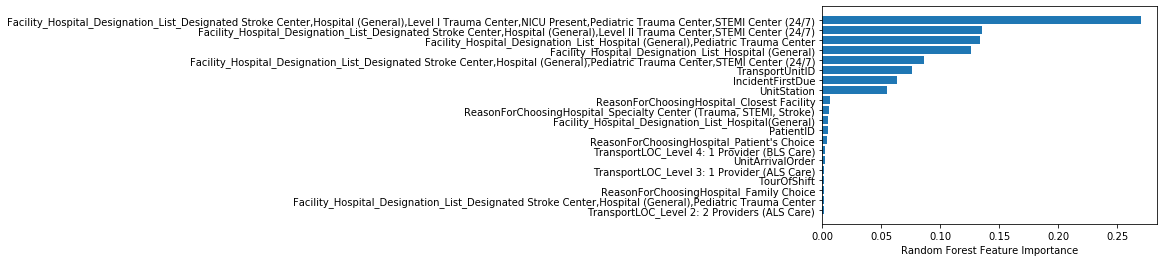

In [128]:
sorted_idx = clfRandom.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx[-20:]], clfRandom.feature_importances_[sorted_idx[-20:]])
plt.xlabel("Random Forest Feature Importance")

#### Model 2 - Random Forest  ends here

#### Model 3 - Decision tree starts here

In [129]:
model_DT = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40,
            max_features=100, max_leaf_nodes=16,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [130]:
clf_DT = model_DT.fit(X_train, y_train)

D:\Softwares\anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
D:\Softwares\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


In [131]:
y_train_pred = clf_DT.predict(X_train)

In [132]:
confusion_matrix(y_train, y_train_pred)

array([[  295,   898,    73,     0,     0,  2873,     0,     0,     5,
            0,     0,     0,     0,     0,   782,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [   41,  1804,    48,     0,     0,  1592,     0,     0,   848,
            0,     0,     0,     0,     0,   217,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    3,     0,  4521,  7029,     0,    19,     0,     0,   255,
            0,     0,     0,     0,     0,    43,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,  1167, 34040,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    3,     0,    12,    56,     0,     8,     0,     0,    21,
            0

In [133]:
f1_score(y_train, y_train_pred,average='weighted')

0.6197482345194167

In [134]:
accuracy_score(y_train, y_train_pred)

0.6691270043268007

In [135]:
y_test_pred = clf_DT.predict(X_test)

In [136]:
f1_score(y_test, y_test_pred,average='weighted')

0.6160589177214506

In [137]:
accuracy_score(y_test, y_test_pred)

0.6664687145710738

In [348]:
confusion_matrix(y_test, y_test_pred)

array([[ 3951,   455,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [ 1987,  1999,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0, 11493,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,     0,     0, 35939,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0],
       [    0,    36,     0,     0,     0,    29,     0,

#### Model 3 - Decision tree ends here

#### Model 4 - Decision tree with top 20 features 

In [350]:
# UnitStation
# TransportUnitID
# IncidentFirstDue
# ReasonForChoosing
# TransportLOC
# ShiftDay

In [138]:
print(patientunitsmerge.shape, incidents.shape)
incidentpatientunitsmerge = patientunitsmerge.merge(incidents, how="left", on="PrimaryKey")
incidentpatientunitsmerge.shape

(125157, 19) (122290, 10)


(125157, 28)

In [139]:

incidentpatientunitsmerge =incidentpatientunitsmerge[['TransportHospitalCode','UnitStation', 'TransportUnitID', 'IncidentFirstDue', 'ReasonForChoosingHospital', 'TransportLOC', 'ShiftDay']] 


In [140]:
incidentpatientunitsmerge.shape

(125157, 7)

In [141]:
# Categorical data types
incidentpatientunitsmerge.select_dtypes(exclude=['int64','int','int32','float','datetime64[ns]']).columns 



Index(['TransportHospitalCode', 'UnitStation', 'TransportUnitID',
       'ReasonForChoosingHospital', 'TransportLOC', 'ShiftDay'],
      dtype='object')

In [142]:
Feature_list = ['UnitStation', 'TransportUnitID', 'ReasonForChoosingHospital']

In [143]:
subset_dataframe_featurelist=[]
for variable in Feature_list:
    subset_dataframe_featurelist.append(pd.get_dummies(incidentpatientunitsmerge[variable],prefix=variable, dummy_na=False))

In [144]:
merged_subset_dataframe_featurelist = pd.concat(subset_dataframe_featurelist, axis=1)
merged_subset_dataframe_featurelist.shape

(125157, 438)

In [145]:
%%time
incidentpatientunitsmerged = pd.concat([merged_subset_dataframe_featurelist, incidentpatientunitsmerge], axis=1)
incidentpatientunitsmerged.shape

Wall time: 54 ms


(125157, 445)

In [146]:
# Drop nominal features already converted in numerical features using get_dummies
incidentpatientunitsmerged.drop(Feature_list, axis=1, inplace=True)
incidentpatientunitsmerged.shape

(125157, 442)

In [147]:
incidentpatientunitsmerged.loc[incidentpatientunitsmerged['TransportHospitalCode'] == 'No Hospital service', 'TransportHospitalCode'] = 111

In [148]:
X= incidentpatientunitsmerged.drop(columns = ['TransportHospitalCode'])


y = pd.to_numeric(incidentpatientunitsmerged['TransportHospitalCode'])

X.shape, y.shape

((125157, 441), (125157,))

In [149]:

model_DT = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=40,
            max_features=100, max_leaf_nodes=16,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [150]:
clf_DT = model_DT.fit(X_train, y_train)


D:\Softwares\anaconda3\lib\site-packages\sklearn\tree\_classes.py:301: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  FutureWarning)
D:\Softwares\anaconda3\lib\site-packages\sklearn\tree\_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


In [151]:
y_train_pred = clf_DT.predict(X_train)

In [152]:
f1_score(y_train, y_train_pred,average='weighted')

0.6197482345194167

In [153]:
accuracy_score(y_train, y_train_pred)

0.6691270043268007

In [154]:
y_test_pred = clf_DT.predict(X_test)

In [155]:
f1_score(y_test, y_test_pred,average='weighted')

0.6160589177214506

In [156]:
accuracy_score(y_test, y_test_pred)

0.6664687145710738

#### Model 6 - Random forest with top 20 features 

In [158]:
clf_GS_Model_RF2_1 = GridSearchCV(pipe, parameters, scoring=make_scorer(f1_score, average='weighted'))


In [159]:


%time clf_GS_Model_RF2_1.fit(X_train, y_train)

D:\Softwares\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Wall time: 33.6 s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                            

In [164]:
pd.DataFrame(clf_GS_Model_RF2_1.cv_results_).sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,2.712835,0.049987,0.183295,0.015205,15,25,"{'rf__max_depth': 15, 'rf__n_estimators': 25}",0.923417,0.929176,0.918640,0.931059,0.926145,0.925687,0.004383,1
2,1.239146,0.064202,0.091553,0.001854,15,10,"{'rf__max_depth': 15, 'rf__n_estimators': 10}",0.917145,0.918450,0.915947,0.916678,0.911615,0.915967,0.002324,2
1,1.027600,0.051732,0.132729,0.004620,5,25,"{'rf__max_depth': 5, 'rf__n_estimators': 25}",0.722435,0.589143,0.533589,0.642414,0.660394,0.629595,0.064165,3
0,0.536894,0.052934,0.077161,0.008416,5,10,"{'rf__max_depth': 5, 'rf__n_estimators': 10}",0.578726,0.386035,0.563670,0.526787,0.520065,0.515057,0.068156,4


In [165]:
# Viewing The Best Parameters
print('Best n estimator:', clf_GS_Model_RF2_1.best_estimator_.get_params()['rf__n_estimators'])
print('Best max_depth:', clf_GS_Model_RF2_1.best_estimator_.get_params()['rf__max_depth'])
print('Best min_samples_split:', clf_GS_Model_RF2_1.best_estimator_.get_params()['rf__min_samples_split'])

Best n estimator: 25
Best max_depth: 15
Best min_samples_split: 2


In [162]:
y_train_pred = clf_GS_Model_RF2_1.best_estimator_.predict(X_train)
# y_train_pred = clfRandom.predict(X_train)

f1_score(y_train, y_train_pred,average='weighted')

print(classification_report(y_train,y_train_pred))

accuracy_score(y_train, y_train_pred)



              precision    recall  f1-score   support

           1       0.81      0.91      0.86      4926
           3       0.89      0.77      0.82      4550
          11       0.99      1.00      0.99     11870
          16       1.00      1.00      1.00     35207
          36       1.00      1.00      1.00       100
          47       0.81      0.99      0.89     10714
          58       0.00      0.00      0.00       119
          59       0.00      0.00      0.00        54
          95       1.00      1.00      1.00     12229
         102       1.00      0.62      0.76        68
         107       1.00      0.50      0.67         8
         116       0.00      0.00      0.00         2
         202       1.00      0.14      0.25       477
         204       1.00      0.10      0.17        94
         205       0.81      0.68      0.74      3155
         213       0.90      0.40      0.55      1902
         215       0.92      1.00      0.96       316
         216       0.00    

D:\Softwares\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.9431962794141465

In [163]:

y_test_pred= clf_GS_Model_RF2_1.best_estimator_.predict(X_test)
# y_cross_validation_pred= clfRandom.predict(X_cross_validation)
f1_score(y_test, y_test_pred, average='weighted')

print(classification_report(y_test,y_test_pred))

accuracy_score(y_test,y_test_pred)

y_test_pred= clf_GS_Model_RF2_1.best_estimator_.predict(X_test)
# y_cross_validation_pred= clfRandom.predict(X_cross_validation)
f1_score(y_test, y_test_pred, average='weighted')

D:\Softwares\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           1       0.76      0.86      0.81      2040
           3       0.83      0.71      0.76      1919
          11       0.98      1.00      0.99      5105
          16       1.00      1.00      1.00     15152
          36       1.00      0.95      0.98        62
          47       0.77      0.98      0.86      4522
          58       0.00      0.00      0.00        48
          59       0.00      0.00      0.00        32
          95       1.00      1.00      1.00      5235
         102       0.92      0.30      0.45        37
         107       0.00      0.00      0.00         3
         202       0.75      0.04      0.07       231
         204       0.00      0.00      0.00        48
         205       0.74      0.58      0.65      1398
         213       0.78      0.29      0.42       806
         215       0.86      0.99      0.92       148
         216       0.00      0.00      0.00         3
         324       0.00    

0.9169018864944015

#### Model 6 - Random forest with top 20 features ends here

#### Model for week 12- Full Sprint 3 - code ends here 

###  Creating 20 different models using random forest

In [166]:
clfRandom = RandomForestClassifier(bootstrap=True, random_state=0, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
            oob_score=False, verbose=0,
            warm_start=False)

In [167]:
pipe = Pipeline([
    ('rf', clfRandom)
])

In [168]:
parameters = {
    'rf__n_estimators': [10,25],
    'rf__max_depth': [5,15]
    
}

In [169]:
 
clf_GS_Model_1 = GridSearchCV(pipe, parameters, scoring=make_scorer(f1_score, average='weighted'))

In [170]:
%time clf_GS_Model_1.fit(X_train, y_train)

D:\Softwares\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Wall time: 33.5 s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('rf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                            

In [171]:
pd.DataFrame(clf_GS_Model_1.cv_results_).sort_values("rank_test_score").head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rf__max_depth,param_rf__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,2.700656,0.102592,0.173693,0.006693,15,25,"{'rf__max_depth': 15, 'rf__n_estimators': 25}",0.923417,0.929176,0.918640,0.931059,0.926145,0.925687,0.004383,1
2,1.202910,0.038937,0.096144,0.009511,15,10,"{'rf__max_depth': 15, 'rf__n_estimators': 10}",0.917145,0.918450,0.915947,0.916678,0.911615,0.915967,0.002324,2
1,1.066185,0.045968,0.130526,0.003500,5,25,"{'rf__max_depth': 5, 'rf__n_estimators': 25}",0.722435,0.589143,0.533589,0.642414,0.660394,0.629595,0.064165,3
0,0.537288,0.024777,0.075223,0.002563,5,10,"{'rf__max_depth': 5, 'rf__n_estimators': 10}",0.578726,0.386035,0.563670,0.526787,0.520065,0.515057,0.068156,4


In [172]:
# Viewing The Best Parameters
print('Best n estimator:', clf_GS_Model_1.best_estimator_.get_params()['rf__n_estimators'])
print('Best max_depth:', clf_GS_Model_1.best_estimator_.get_params()['rf__max_depth'])
print('Best min_samples_split:', clf_GS_Model_1.best_estimator_.get_params()['rf__min_samples_split'])

Best n estimator: 25
Best max_depth: 15
Best min_samples_split: 2


In [173]:
y_train_pred = clf_GS_Model_1.best_estimator_.predict(X_train)
# y_train_pred = clfRandom.predict(X_train)

f1_score(y_train, y_train_pred,average='weighted')

0.9357381340301283

In [174]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           1       0.81      0.91      0.86      4926
           3       0.89      0.77      0.82      4550
          11       0.99      1.00      0.99     11870
          16       1.00      1.00      1.00     35207
          36       1.00      1.00      1.00       100
          47       0.81      0.99      0.89     10714
          58       0.00      0.00      0.00       119
          59       0.00      0.00      0.00        54
          95       1.00      1.00      1.00     12229
         102       1.00      0.62      0.76        68
         107       1.00      0.50      0.67         8
         116       0.00      0.00      0.00         2
         202       1.00      0.14      0.25       477
         204       1.00      0.10      0.17        94
         205       0.81      0.68      0.74      3155
         213       0.90      0.40      0.55      1902
         215       0.92      1.00      0.96       316
         216       0.00    

D:\Softwares\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [175]:
accuracy_score(y_train, y_train_pred)

0.9431962794141465

In [176]:
y_test_pred= clf_GS_Model_1.best_estimator_.predict(X_test)
# y_cross_validation_pred= clfRandom.predict(X_cross_validation)
f1_score(y_test, y_test_pred, average='weighted')

0.9169018864944015

In [177]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.76      0.86      0.81      2040
           3       0.83      0.71      0.76      1919
          11       0.98      1.00      0.99      5105
          16       1.00      1.00      1.00     15152
          36       1.00      0.95      0.98        62
          47       0.77      0.98      0.86      4522
          58       0.00      0.00      0.00        48
          59       0.00      0.00      0.00        32
          95       1.00      1.00      1.00      5235
         102       0.92      0.30      0.45        37
         107       0.00      0.00      0.00         3
         202       0.75      0.04      0.07       231
         204       0.00      0.00      0.00        48
         205       0.74      0.58      0.65      1398
         213       0.78      0.29      0.42       806
         215       0.86      0.99      0.92       148
         216       0.00      0.00      0.00         3
         324       0.00    

D:\Softwares\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [178]:
accuracy_score(y_test,y_test_pred)

0.92752253954543

In [179]:
clfRandom = clf_GS_Model_1.best_estimator_

In [180]:
# Best model 
# clfRandom = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#             max_depth=15, max_features='auto', max_leaf_nodes=None,
#             min_impurity_decrease=0.0, min_impurity_split=None,
#             min_samples_leaf=1, min_samples_split=2,
#             min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
#             oob_score=False, random_state=42, verbose=0,
#             warm_start=False)

clfRandom = clf_GS_Model_1.best_estimator_.get_params()["rf"]

In [181]:
%time clfRandom.fit(X_train, y_train)

Wall time: 3.5 s


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [182]:
y_test_pred= clfRandom.predict(X_test)

Text(0.5, 0, 'Random Forest Feature Importance')

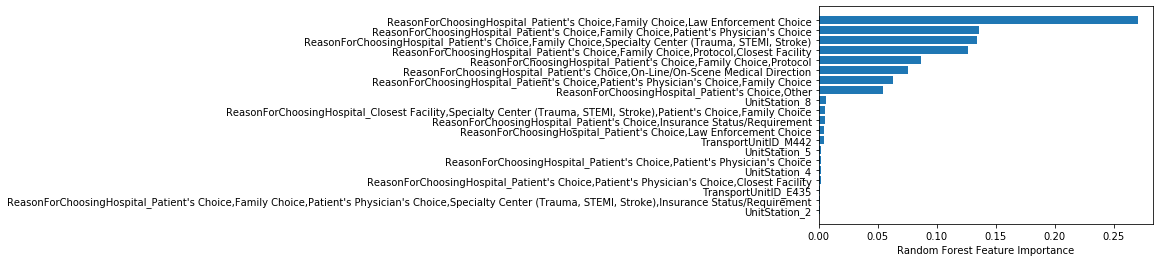

In [183]:
sorted_idx = clfRandom.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx[-20:]], clfRandom.feature_importances_[sorted_idx[-20:]])
plt.xlabel("Random Forest Feature Importance")

#### ends Results for week -12 Random forest grid search cv